#**DEEP LEARNING PROJECT-2**






#**TEXT CLASSIFICATION USING DEEP NEURAL NETWORKS**

#**Classify Amazon reviews using:-**

**i) convolutional neural networks and**

**ii) LSTM + attention networks. The project involves the following steps:**

**1. Collect user reviews (Amazon) that are available on internet sources**

**2. Perform pre-processing of text - removal of stop words, stemming / lemmatization, ...**

**3. Split the data into train and test tests (80% train and 20% test)**

**4. Use either GloVe or Word2Vec to represent words as numerical vectors**

**5. Train CNN , LSTM + Attention networks using your own architectures on training data**

**6. Validate the model on the test data**

**7. Fine tune the parameters to increase the classification accuracies of the model on training and test data.**

##**IMPORTING THE LIBRARIES**

In [ ]:
# IMPORTING THE DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.utils import resample,shuffle
import re

##**LOADING THE DATASET**

In [ ]:
# LOADING THE FILE
df=pd.read_csv('/content/amazon (1) (1).csv')

In [ ]:
# CHOOSING ONLY RELEVANT COLUMNS FROM THE DATASET
df = df[['overall','reviewText']]

##**DATA PRE-PROCESSING**

In [ ]:
# DISPLAYING THE TOP 5 DATA POINTS FROM WHOLE DATASET
df.head()

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


In [ ]:
# CHECKING FOR NULL VALUES IF ANY
df.isnull().sum()

overall       0
reviewText    1
dtype: int64

In [ ]:
# DROPPING THE FOUND NULL VALUES
df = df.dropna()

In [ ]:
# RECHECKING THE NULL VALUES
df.isnull().sum()

overall       0
reviewText    0
dtype: int64

In [ ]:
# PUTTING CONDITIONS FOR POSITIVE AND NEGATIVE REVIEWS
# IF RATING IS >= 4 THEN ASSIGNING POSITIVE LABEL OTHERWISE NEGATIVE LABEL
conditions = [(df['overall']>=4),(df['overall']<=3)]
values =["Positive","Negative"]

In [ ]:
# ADDING "LABEL" COLUMN TO DATAFRAME CONSITIVE POSITIVE OR POSITIVE LABELS
df['label'] = np.select(conditions,values)

In [ ]:
# CHECKING THE TOP 5 DATAPOINTS FROM THE DATASET
df.head()

,overall,reviewText,label
0,4,No issues.,Positive
1,5,"Purchased this for my device, it worked as adv...",Positive
2,4,it works as expected. I should have sprung for...,Positive
3,5,This think has worked out great.Had a diff. br...,Positive
4,5,"Bought it with Retail Packaging, arrived legit...",Positive


In [ ]:
# SPLITTING THE DATASET ACCORDING TO POSITIVE AND NEGATIVE LABEL
d_major =df[df['label'] == 'Positive']
d_minor =df[df['label'] == 'Negative']

In [ ]:
# DATA UPSAMPLING
d_minor_upsampled = resample(d_minor, replace = True, n_samples = d_major.shape[0],random_state =42)

# CONCATENATE WITH MAJORITY CLASS
df = pd.concat([d_major,d_minor_upsampled])

In [ ]:
# HAVE A LOOK AT THE DATAFRAME
df.head()

,overall,reviewText,label
0,4,No issues.,Positive
1,5,"Purchased this for my device, it worked as adv...",Positive
2,4,it works as expected. I should have sprung for...,Positive
3,5,This think has worked out great.Had a diff. br...,Positive
4,5,"Bought it with Retail Packaging, arrived legit...",Positive


In [ ]:
# DEFINING A FUNCTION FOR TEXT CLEANING
def clean_text(text):
  text = re.sub("([\w\.\-\_]+@[\w\.\-\_]+)", "", text)  # REMOVING SPECIAL CHARATERS OCCURING IN EMAILS
  text = re.sub("(\d+)", "", text)                      # REMOVING DIGITS
  text = re.sub("(\n+)", "", text)                      # REMOVING NEWLINE CHARACTERS
  return text

In [ ]:
# APPLYING THE TEXT CLEANING FUNCTION ON 'reviewText' COLUMN
df["reviewText"] = df['reviewText'].apply(clean_text)

In [ ]:
# CREATING A SINGLE STRING REPRESENTATION OF THE ENTIRE TEXT
text = ' '.join(df['reviewText'].to_list())
text

'No issues. Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me. it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before This think has worked out great.Had a diff. bran gb card and if went south after  months.This one has held up pretty well since I had my S, now on my Note.*** update //I\'ve had this for a few months and have had ZERO issue\'s since it was transferred from my S to my Note and into a note. This card is reliable and solid!Cheers! Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a  and  both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you\'ll get for a nice sd card It\'s mini storage.  It doesn\'t do anything

In [ ]:
# CHECKING THE TYPE OF TEXT
type(text)

str

##**DATA VISUALIZATION**

In [ ]:
# IMPORTING THE LIBRARIES
import matplotlib.pyplot as plt
from wordcloud import WordCloud

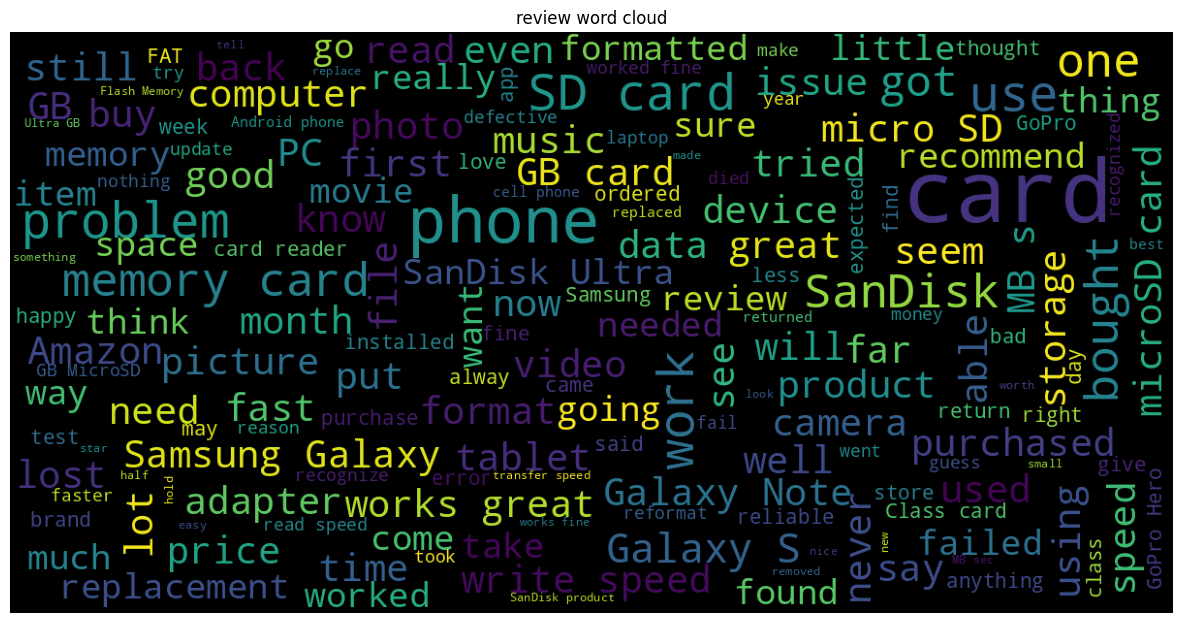

In [ ]:
# REPRESNTING THE TEXT IN WORD CLOUD
wordcloud = WordCloud(background_color = "black", max_words = 800, max_font_size =30,colormap= 'viridis',scale=3,random_state=32).generate(text)
fig = plt.figure(1, figsize = (15,10))
plt.axis('off')
plt.title("review word cloud")
plt.imshow(wordcloud)
plt.show()

##**TEXT CLEANING/PRE-PROCESSING**

In [ ]:
# IMPORTING THE NEEDED LIBRARIES
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##**REMOVING STOPWORDS**

In [ ]:
# DEFINING A FUNCTION TO REMOVE STOPWORDS
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
  filtered_sentence = []

  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  return filtered_sentence


In [ ]:
# APPLYING THE 'remove_stopwords' FUNCTION TO THE TEXT
df['reviewText'] =df['reviewText'].apply(remove_stopwords)

##**TOKENISING**

In [ ]:
# DEFINING A TOKENIZING FUNCTION
def tokenizing(review):
  tokens = nltk.word_tokenize(review)
  return tokens

#**STEMMING**

In [ ]:
# DEFINING A STEMMING FUNCTION
def stemming(text):

  ps = PorterStemmer()
  filsent =[]
  for w in text:
     filsent.append(ps.stem(w))
  return filsent

In [ ]:
# APPLYING THE STEMMING FUNCTION ON REVIEWS COLUMN
df['reviewText'] =df['reviewText'].apply(stemming)


In [ ]:
# HAVING A LOOK AT THE COLUMN
df['reviewText']

0                                           [no, issu, .]
1       [purchas, devic, ,, work, advertis, ., you, ne...
2       [work, expect, ., i, sprung, higher, capac, .,...
3       [thi, think, work, great.had, diff, ., bran, g...
4       [bought, retail, packag, ,, arriv, legit, ,, o...
                              ...                        
4581    [i, bought, galaxi, note, ., ,, function, prop...
4162    [got, sdsdqu-g-affp-a, decemb, ,, ,, die, may,...
217     [i, bought, card, strength, gb, xdsc, sandisk,...
3391    [i, purhcas, card, hero, cam, ., it, work, las...
1709    [thi, card, exactli, ., class-, perform, fair,...
Name: reviewText, Length: 8896, dtype: object

##**Using "Word2Vec" To Represent Words As Numerical Vectors**

In [ ]:
# IMPORTING THE DEPENDENCIES
from gensim.models.word2vec import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
# CREATING A LIST OF REVIEWS FROM 'reviewText' COLUMN
review = []
for i in df['reviewText']:
    review.append(i)


In [ ]:
# EXTRACTING FIRST TWO REVIEW TEXT FROM LIST
review[:2]

[['no', 'issu', '.'],
 ['purchas',
  'devic',
  ',',
  'work',
  'advertis',
  '.',
  'you',
  'never',
  'much',
  'phone',
  'memori',
  ',',
  'sinc',
  'i',
  'download',
  'lot',
  'stuff',
  'brainer',
  '.']]

In [ ]:
# USING THE WORD2VEC MODEL FROM THE GENSIM LIBRARY TO TRAIN A WORD2VEC MODEL ON A LIST OF REVIEW TEXTS.
word2vec_model = Word2Vec(review, vector_size=500, window=3, min_count=1, workers=16)


In [ ]:
# PRINTING THE MODEL
print(word2vec_model )

Word2Vec<vocab=7471, vector_size=500, alpha=0.025>


In [ ]:
# USING THE 'TOKENIZER' CLASS FROM THE 'KERAS' LIBRARY TO CONVERT TEXT DATA INTO SEQUENCE OF INEGERS.
# AND THEN USING "PAD_SEQUENCES" O ENSURE THAT THESE SEQUENCES HAVE A CONSISTENT LENGTH.
token = Tokenizer(7471)
token.fit_on_texts(df['reviewText'])
text = token.texts_to_sequences(df['reviewText'])
text = pad_sequences(text, 75)
print(text[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0  155   43    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
    64   42    3    5  268    1  263   88  110    6   16    3  114    2
   308   94  368 1447    1]]


##**Label Encoding**

In [ ]:
# IMPORTING THE REQUIRED DEPENDENCIES
from sklearn import preprocessing
from keras.utils import to_categorical

In [ ]:
# USING Scikit-learn's, "LabelEncoder" AND KERAS'S "to_categorical" FUNCTIONS TO PREPROCESS THE LABELS IN THE 'LABEL' COLUMN OF A DATAFRAME.
le = preprocessing.LabelEncoder()      # used to convert categorical labels into numerical labels.
y = le.fit_transform(df['label'])      # It assigns a unique numerical label to each unique category in the 'label' column
y = to_categorical(y)                  # using Keras's "to_categorical" function to convert the numerical labels into one-hot encoded vectors
y[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

##**TRAIN-TEST-SPLIT**

In [ ]:
# IMPORTING THE SKLEARN'S TRAIN_TEST_SPLIT FUNCTION
from sklearn.model_selection  import train_test_split


In [ ]:
# SPLITTING THE DATASET INTO TRAINING AND TEST SET. 80% TRAINING AND 20% TEST SET.
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [ ]:
#  DEFINING A FUNCTION 'gensim_to_keras_embedding' THAT CONVERTS A GENSIM WORD EMBEDDING MODEL TO KERAS EMBEDDING LAYER.
from tensorflow.keras.layers import Embedding
def gensim_to_keras_embedding(model, train_embeddings=False):
  keyed_vectors = model.wv  # structure holding the result of training
  weights = keyed_vectors.vectors  # vectors themselves, a 2D numpy array
  index_to_key = keyed_vectors.index_to_key  # which row in `weights` corresponds to which word?

  layer = Embedding(
      input_dim=weights.shape[0],
      output_dim=weights.shape[1],
      weights=[weights],
      trainable=train_embeddings,
    )
  return layer

In [ ]:
# USING THE PREVIOUSLY DEFINED 'gensim_to_keras_embedding' FUNCTION.
wv =gensim_to_keras_embedding(word2vec_model, train_embeddings=False)

##**CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [ ]:
# IMPORTING THE LIBRARIES
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation, Input
from keras.layers import Conv2D

In [ ]:
# DEFINING A SEQUENTIAL MODEL
keras_model = Sequential()

# ADDING THE EMBEDDING LAYER CREATED EARLIER (wv)
keras_model.add(wv)

# ADDING A DROPOUT LAYER WITH A DROPOUT RATE OF 0.2
keras_model.add(Dropout(0.2))

# ADDING TWO CONV1D LAYERS WITH 50 FILTERS, KERNEL SIZE3 3, 'RELU' ACTIVATION, 'SAME' PADDING, AND STRIDE 1.
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(50, 3, activation='relu', padding='same', strides=1))

# ADDING A 'MaxPool1D' LAYER
keras_model.add(MaxPool1D())

# ADDING A ANOTHER DROPOUT LAYER
keras_model.add(Dropout(0.2))

# ADDING TWO 'Conv1D' LAYERS WITH 100 FILTERS, KERNEL SIZE 3, 'RELU' ACTIVATION, 'SAME' PADDING, AND STRIDE 1
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(100, 3, activation='relu', padding='same', strides=1))

# Adding a MaxPool1D layer
keras_model.add(MaxPool1D())

# Adding another Dropout layer
keras_model.add(Dropout(0.2))

# Adding two Conv1D layers with 200 filters, kernel size 3, 'relu' activation, 'same' padding, and stride 1
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(200, 3, activation='relu', padding='same', strides=1))

# Adding GlobalMaxPool1D layer
keras_model.add(GlobalMaxPool1D())

# Adding another Dropout layer
keras_model.add(Dropout(0.2))

# A fully connected layer (Dense) with 200 units, followed by a ReLU activation.
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))

# Adding another Dropout layer
keras_model.add(Dropout(0.2))

# Adding a Dense layer with 2 units (output layer for binary classification)
keras_model.add(Dense(2))
keras_model.add(Activation('softmax'))

# Compile the model with Mean Squared Error loss, accuracy metric, and the Adam optimizer
keras_model.compile(loss='mse', metrics=['acc'], optimizer='adam')

# Training the model on training data (x_train, y_train) for 3 epochs
# Using a batch size of 16 and provide validation data (x_test, y_test)
keras_model.fit(x_train, y_train, batch_size=16, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
445/445 [==============================] - 24s 48ms/step - loss: 0.1779 - acc: 0.7423 - val_loss: 0.1345 - val_acc: 0.8107
Epoch 2/3
445/445 [==============================] - 25s 56ms/step - loss: 0.1163 - acc: 0.8467 - val_loss: 0.0883 - val_acc: 0.8848
Epoch 3/3
445/445 [==============================] - 23s 52ms/step - loss: 0.0854 - acc: 0.8918 - val_loss: 0.0752 - val_acc: 0.8966


In [ ]:
# Checking THE SHAPE OF THE DATA
print(x_train.shape, y_train.shape)

(7116, 75) (7116, 2)


In [ ]:
# HAVING A LOOK AT MODEL'S SUMMARY
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         3735500   
                                                                 
 dropout (Dropout)           (None, None, 500)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 50)          75050     
                                                                 
 conv1d_1 (Conv1D)           (None, None, 50)          7550      
                                                                 
 max_pooling1d (MaxPooling1  (None, None, 50)          0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, None, 50)          0         
                                                        

#**BUIDING A LONG-SHORT-TERM-MEMORY (LSTM) MODEL**

In [ ]:
# IMPORTING LSTM FROM KERAS
from keras.layers import LSTM

In [ ]:
# Initializing a sequential model
model = Sequential()

# A word embedding layer added to the model.
model.add(wv)

# Adding an LSTM layer to the model
model.add(LSTM(100, activation='relu', input_shape=(7471, 500)))

# A Dense layer with a single unit is added. This is the output layer of the model.
model.add(Dense(1))

# The model is compiled with the Adam optimizer and Mean Squared Error (MSE) as the loss function.
model.compile(optimizer='adam', loss='mse')

# The model is trained on the training data (x_train and y_train) for 5 epochs using the specified optimizer and loss function.
model.fit(x_train, y_train, epochs=5)

# Printing a summary of the model
model.summary()


Epoch 1/5
223/223 [==============================] - 29s 125ms/step - loss: 0.2547
Epoch 2/5
223/223 [==============================] - 28s 126ms/step - loss: 0.2502
Epoch 3/5
223/223 [==============================] - 29s 131ms/step - loss: 0.2501
Epoch 4/5
223/223 [==============================] - 28s 126ms/step - loss: 0.2501
Epoch 5/5
223/223 [==============================] - 28s 125ms/step - loss: 0.2500
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         3735500   
                                                                 
 lstm_1 (LSTM)               (None, 100)               240400    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3976001 (15.17 MB)
Tr

#**Validating the  Model on Test Data**

---



---




In [ ]:
# Training a Keras model on the training data for 12 epochs using a batch size of 100
history = keras_model.fit(x_train, y_train, epochs=12, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/12
72/72 [==============================] - 25s 354ms/step - loss: 0.0550 - acc: 0.9320 - val_loss: 0.0535 - val_acc: 0.9331
Epoch 2/12
72/72 [==============================] - 18s 245ms/step - loss: 0.0445 - acc: 0.9488 - val_loss: 0.0457 - val_acc: 0.9421
Epoch 3/12
72/72 [==============================] - 17s 235ms/step - loss: 0.0398 - acc: 0.9536 - val_loss: 0.0342 - val_acc: 0.9624
Epoch 4/12
72/72 [==============================] - 21s 289ms/step - loss: 0.0349 - acc: 0.9595 - val_loss: 0.0596 - val_acc: 0.9258
Epoch 5/12
72/72 [==============================] - 16s 229ms/step - loss: 0.0351 - acc: 0.9592 - val_loss: 0.0306 - val_acc: 0.9652
Epoch 6/12
72/72 [==============================] - 21s 298ms/step - loss: 0.0327 - acc: 0.9612 - val_loss: 0.0428 - val_acc: 0.9455
Epoch 7/12
72/72 [==============================] - 23s 309ms/step - loss: 0.0311 - acc: 0.9623 - val_loss: 0.0411 - val_acc: 0.9494
Epoch 8/12
72/72 [==============================] - 17s 233ms/step - 

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt

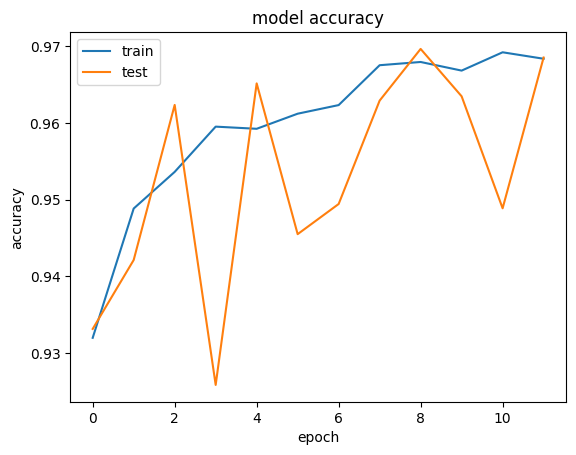

In [ ]:
# Creating a plot that displays the training and validation accuracy of a neural network model over multiple epochs
plt.plot(history.history[ 'acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

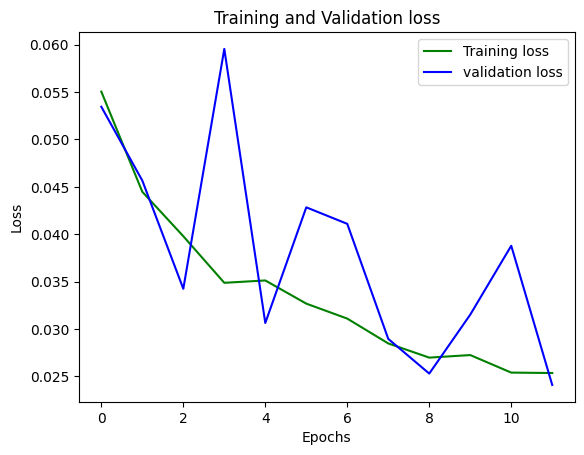

In [ ]:
# Creating a plot that illustrates the training and validation loss of a neural network model over multiple epochs
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,12)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# To evaluate the performance of a trained model on a specified test dataset.
loss, accuracy = keras_model.evaluate(x_test,y_test)

56/56 [==============================] - 2s 29ms/step - loss: 0.0241 - acc: 0.9685


#**BUILING AN "ATTENTION" NETWORK**

In [ ]:
#It allows you to write code that can run on multiple backends
import keras.backend as K

# The Attention layer is used for implementing attention mechanisms in neural networks.
from keras.layers import Attention

# This is used to create word embeddings
from keras.layers import Embedding

# The Bidirectional layer wraps another layer (such as an LSTM)
# And processes the input sequence in both forward and backward directions.
from keras.layers import Bidirectional

# The Adam optimizer is an optimization algorithm used for training neural networks.
from keras.optimizers import Adam

# The 'EarlyStopping' callback is used during model training to stop the
# training process if a monitored metric (such as validation loss) stops improving.
from keras.callbacks import EarlyStopping

# The Model class is used to instantiate a Keras model.
from keras import Model

# The Layer class is the base class for all layers in Keras.
from keras.layers import Layer

# The plot_model function is used to create a visual representation (plot) of a Keras model.
from keras.utils import plot_model

# 'Precision' and 'Recall' measures the proportion of correctly predicted positive instances
# among the predicted positives (precision) and among the actual positives (recall)
from keras.metrics import Precision, Recall

#**LSTM + ATTENTION NETWORK**

In [ ]:
# This layer is defined as a subclass of Layer in Keras.
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)
    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

# This function defines a binary classification model using Keras.
def lstm_model(input_len, max_features=10000, embed_size=128):
    input_layer = Input(shape=(input_len,), dtype="int32")
    embedded_layer = Embedding(max_features, embed_size)(input_layer)
    lstm_layer = Bidirectional(LSTM(64, return_sequences = True))(embedded_layer)
    attention_layer = attention()(lstm_layer)
    output_layer = Dense(1, activation='sigmoid')(attention_layer)

    model = Model(input_layer, output_layer)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-3),
                  metrics=['accuracy', Precision(), Recall()])
    return model

In [ ]:
# LET'S SEE A QUICK SUMMARY OF THE MODEL ARCHITECTURE
model = lstm_model(input_len=75, max_features=10000, embed_size=128)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 75)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 75, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 75, 128)           98816     
 al)                                                             
                                                                 
 attention (attention)       (None, 75, 128)           203       
                                                                 
 dense_2 (Dense)             (None, 75, 1)             129       
                                                                 
Total params: 1379148 (5.26 MB)
Trainable params: 1379148 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [ ]:
# MODEL WILL STOP TRAINING IF TRAINING LOSS DOESN'T IMPROVE
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1)

#**FITTING AND COMPILING THE MODEL**

In [ ]:
# FITTING AND COMPILING THE MODEL
history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=1, callbacks=[early_stopping])
model.add(Dense(1, activation='sigmoid'))
y_train = y_train.reshape((-1, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
import numpy as np
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)



Epoch 1/20
72/72 [==============================] - 20s 272ms/step - loss: 0.2500
Epoch 2/20
72/72 [==============================] - 19s 268ms/step - loss: 0.2500
Epoch 3/20
72/72 [==============================] - 17s 231ms/step - loss: 0.2500
Epoch 4/20
72/72 [==============================] - 17s 236ms/step - loss: 0.2500
Epoch 5/20
72/72 [==============================] - 18s 246ms/step - loss: 0.2500
Epoch 6/20
72/72 [==============================] - 17s 230ms/step - loss: 0.2500
Epoch 7/20
72/72 [==============================] - 20s 279ms/step - loss: 0.2500
Epoch 8/20
72/72 [==============================] - 18s 254ms/step - loss: 0.2500
Epoch 9/20
72/72 [==============================] - 17s 230ms/step - loss: 0.2500
Epoch 10/20
72/72 [==============================] - 17s 230ms/step - loss: 0.2500
Epoch 11/20
72/72 [==============================] - 16s 229ms/step - loss: 0.2500
Epoch 12/20
72/72 [==============================] - 17s 232ms/step - loss: 0.2500
Epoch 13/20
7

In [ ]:
# CHECKING THE KEYS
history_ = history.history
print(history_.keys())

dict_keys(['loss'])


#**PLOTTING THE TRAINING LOSS**

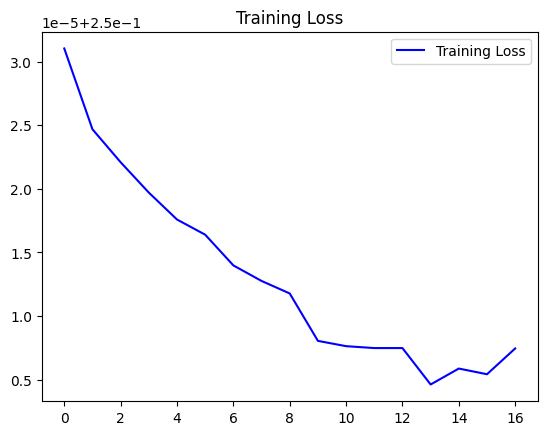

In [ ]:
# PLOTTING THE TRAINING LOSS
history_ = history.history
loss = history_["loss"]
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()